In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Spark Foundation\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.Species.nunique()

3

In [6]:
df_1= df.copy()
df_1 = df_1.drop(["Id"], axis=1)
df_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 0.98, 'Univariate analysis of SepalLengthCm')

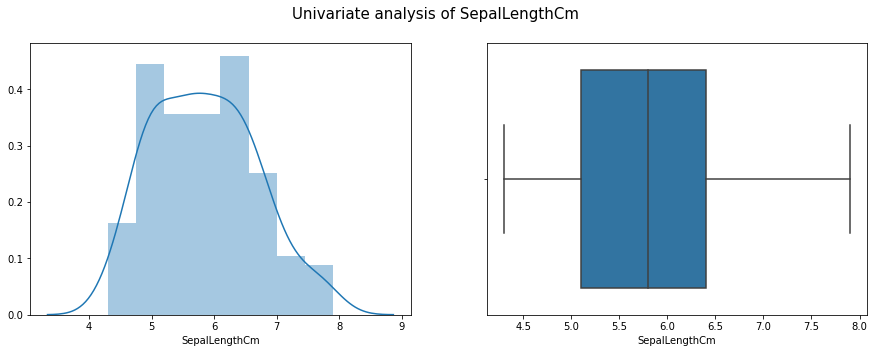

In [7]:
#Univariate Analysis
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df["SepalLengthCm"], ax = axes[0])
sns.boxplot(df["SepalLengthCm"], ax = axes[1])
plt.suptitle("Univariate analysis of SepalLengthCm", fontsize = 15)

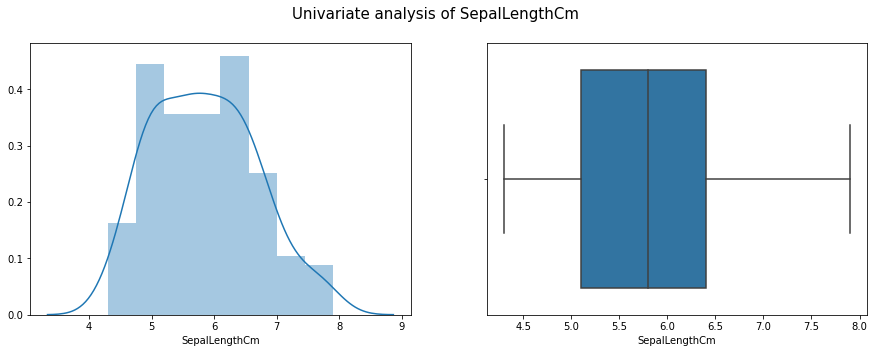

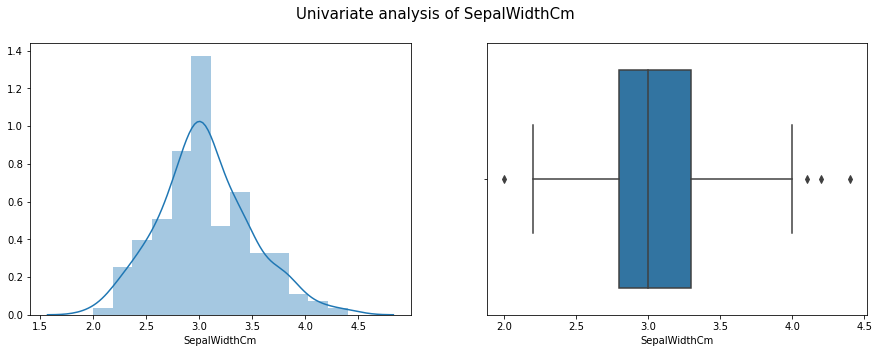

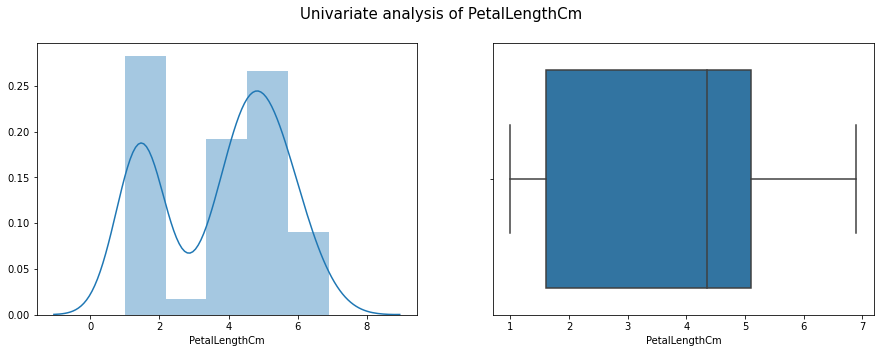

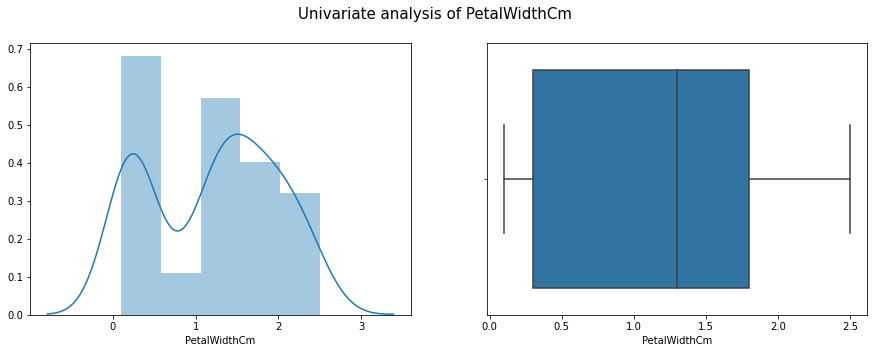

In [8]:
#univariate analysis using for loop and function
def plot(x,indata):
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[x],ax=axes[0])
    sns.boxplot(df[x], ax = axes[1])
    plt.suptitle("Univariate analysis of "+x, fontsize=15)
    plt.show()
x = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
for col in x:
    plot(col, indata=df)
    

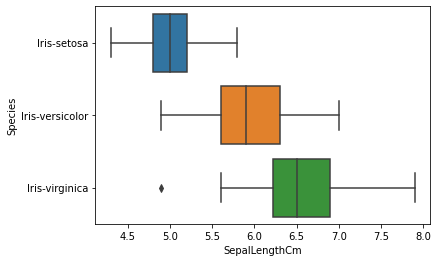

In [9]:
sns.boxplot(x=df_1["SepalLengthCm"],y= df_1["Species"])

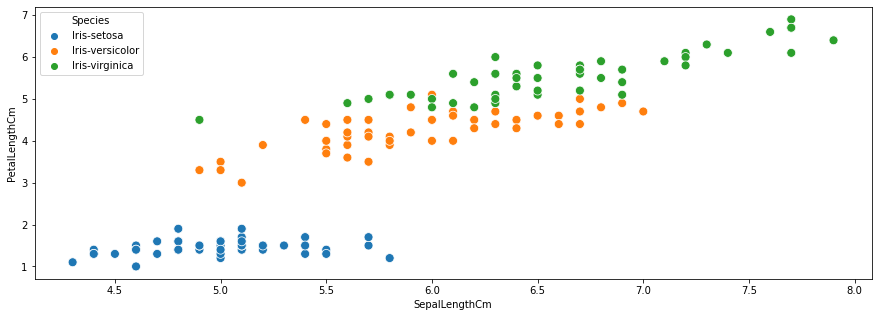

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df_1["SepalLengthCm"], y=df_1["PetalLengthCm"], hue=df_1["Species"], s=80)

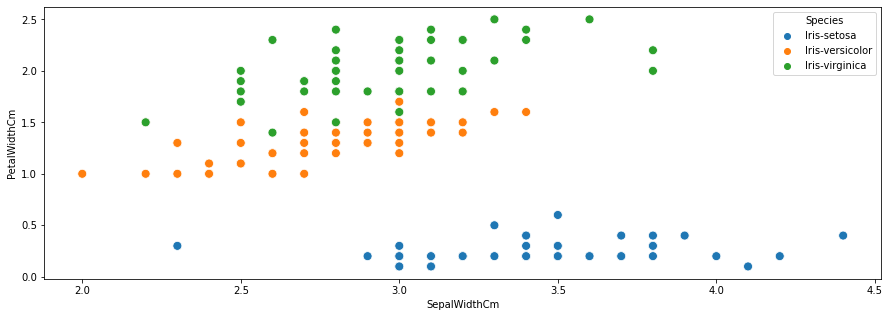

In [11]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df_1["SepalWidthCm"], y=df_1["PetalWidthCm"], hue=df_1["Species"], s=80)

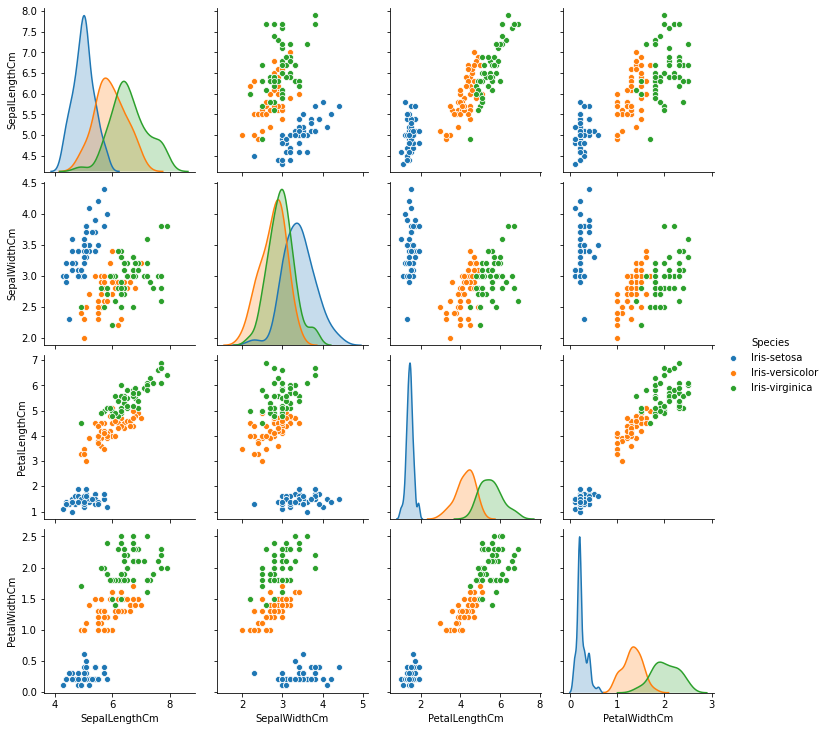

In [12]:
sns.pairplot(df_1, hue="Species")

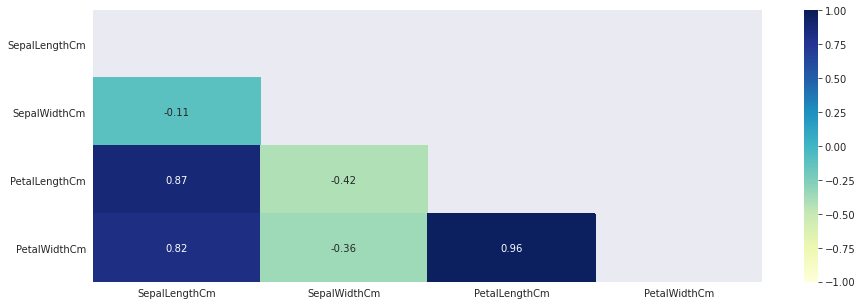

In [13]:
num_cor = df_1.corr()
mask = np.zeros_like(num_cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f,ax = plt.subplots(figsize=(15,5))
    ax = sns.heatmap(num_cor, mask = mask, vmin = -1, vmax =1, annot=True, cmap="YlGnBu")

# k-Means Clustering

In [85]:
from sklearn.cluster import KMeans

In [122]:
X = df_1.iloc[:, [2,3]].values
y = df_1['Species'].map({'Iris-setosa': 0, 'Iris-virginica':1, 'Iris-versicolor':2}).values

In [124]:
clusters = []
for i in range(1,50):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

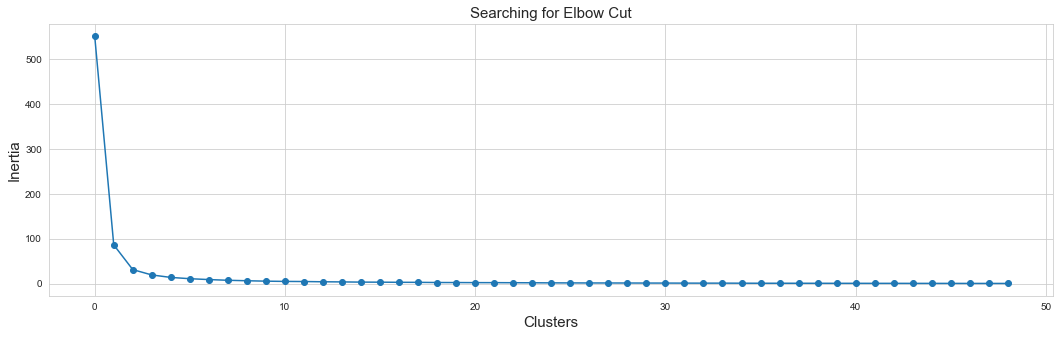

In [125]:
plt.figure(figsize=(18,5))
plt.plot(clusters,'-o')
plt.title("Searching for Elbow Cut", fontsize=15)
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [127]:
km = KMeans(n_clusters=3, random_state=100)
predicted = km.fit_predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [128]:
df_1["labels"] = km.labels_   
df_1[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [129]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

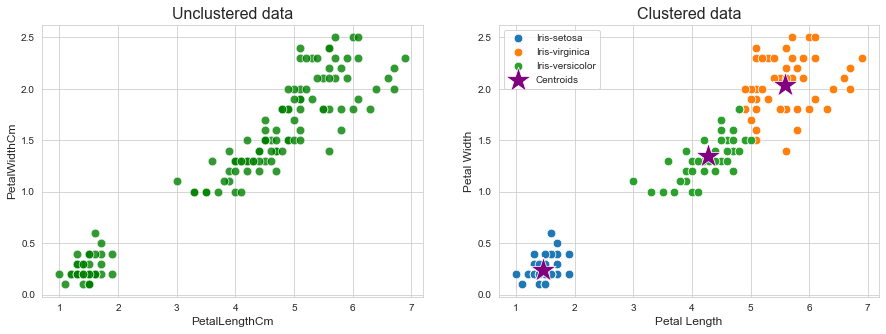

In [132]:
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Unclustered data', fontsize=16)
ax[0].set_xlabel('Petal Length', fontsize=12)
ax[0].set_ylabel('Petal Width', fontsize=12)
sns.scatterplot(df_1['PetalLengthCm'], df_1['PetalWidthCm'], 
                s=75, color='green', alpha=0.8, ax=ax[0])
ax[1].set_title('Clustered data', fontsize=16)
ax[1].set_xlabel('Petal Length', fontsize=12)
ax[1].set_ylabel('Petal Width', fontsize=12)

for i in range(0,3):
    sns.scatterplot(X[predicted == i,0], X[predicted == i,1], s=75,label=species[i], ax=ax[1])
sns.scatterplot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=700, color='purple', label='Centroids', marker='*', ax=ax[1])
plt.show()